In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer 


In [4]:
df = pd.read_csv("Car_sale_ads_new.csv")
df.head(10)

,Unnamed: 0,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Features
0,0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,[]
1,1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,[]
2,2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,Automatic,small_cars,3.0,silver,03/05/2021,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,Manual,small_cars,3.0,blue,30/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,5,62950,PLN,Used,Abarth,595,2016,46060.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"['ABS', 'Electric front windows', 'Drivers air..."
6,6,6,69900,PLN,Used,Abarth,595,2021,2900.0,145.0,1368.0,Gasoline,NaN,Manual,small_cars,2.0,black,29/04/2021,[]
7,7,7,69900,PLN,Used,Abarth,500,2019,20000.0,145.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,white,29/04/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,8,120750,PLN,New,Abarth,595,2021,1.0,180.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,blue,03/05/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,9,93100,PLN,New,Abarth,595,2021,1.0,145.0,1398.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,03/05/2021,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


1-Price change the euro to pln
2-


In [5]:
percent_missing = df. isnull(). sum() * 100 / len(df)
percent_missing

Unnamed: 0                0.000000
Index                     0.000000
Price                     0.000000
Currency                  0.000000
Condition                 0.000000
Vehicle_brand             0.000000
Vehicle_model             0.000000
Production_year           0.000000
Mileage_km                0.471906
Power_HP                  0.308683
Displacement_cm3          0.943813
Fuel_type                 0.000000
Drive                     7.237499
Transmission              0.229952
Type                      0.000000
Doors_number              0.713861
Colour                    0.000000
Offer_publication_date    0.000000
Features                  0.000000
dtype: float64

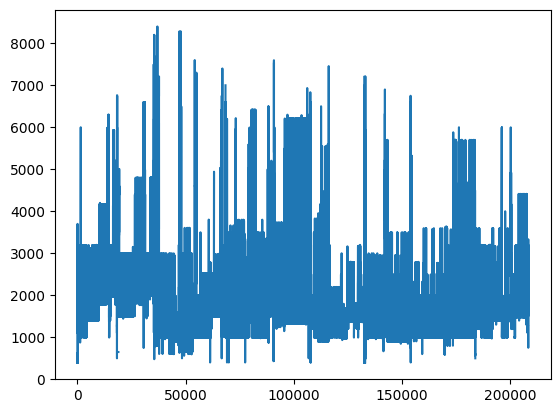

In [6]:
plt.plot(df['Displacement_cm3'])

In [22]:
df.loc[df['Vehicle_brand']=='Jaguar']['Drive']

79475                      Rear wheels
79476                              NaN
79477     4x4 (attached automatically)
79478                     Front wheels
79479     4x4 (attached automatically)
                      ...             
132617                             NaN
132735                     Rear wheels
132813                             NaN
132852                     Rear wheels
132959                     Rear wheels
Name: Drive, Length: 989, dtype: object

In [23]:
item_counts = df['Vehicle_brand'].value_counts()
item_counts.to_dict()


{'Volkswagen': 18455,
 'BMW': 16983,
 'Audi': 16730,
 'Opel': 16322,
 'Ford': 16007,
 'Mercedes-Benz': 12170,
 'Renault': 10702,
 'Toyota': 10206,
 'Škoda': 10166,
 'Peugeot': 9016,
 'Citroën': 7349,
 'Volvo': 6016,
 'Kia': 5978,
 'Hyundai': 5939,
 'Fiat': 5145,
 'Seat': 4907,
 'Nissan': 4876,
 'Mazda': 4621,
 'Honda': 4016,
 'Suzuki': 2634,
 'Mitsubishi': 1968,
 'Jeep': 1767,
 'Dacia': 1655,
 'Chevrolet': 1498,
 'MINI': 1459,
 'Alfa Romeo': 1325,
 'Land Rover': 1222,
 'Porsche': 1080,
 'Jaguar': 989,
 'Lexus': 982,
 'Subaru': 843,
 'Chrysler': 701,
 'Dodge': 690,
 'Saab': 463,
 'Smart': 301,
 'Infiniti': 290,
 'Lancia': 257,
 'SsangYong': 197,
 'Maserati': 189,
 'Cadillac': 164,
 'Cupra': 159,
 'Daihatsu': 148,
 'Aixam': 147,
 'Daewoo': 132,
 'DS Automobiles': 127,
 'Tesla': 90,
 'Bentley': 77,
 'Isuzu': 72,
 'Microcar': 69,
 'Lincoln': 66,
 'Inny': 63,
 'Ferrari': 63,
 'Polonez': 60,
 'Abarth': 59,
 'RAM': 59,
 'Rover': 54,
 'Lada': 47,
 'Ligier': 46,
 'Buick': 32,
 'Hummer': 28,
 'R

In [8]:
# df.describe(include=object)

In [9]:
# df.corr()

In [10]:
# features = df['Features'].to_numpy()
# x = features[15][2:-2] 
# y = x.split(',')
# y[0].replace("'",'')



In [11]:

# brandMode = df.loc[df['Vehicle_brand']=='Abarth']['Drive'].mode()

# df.loc[df['Vehicle_brand'] == 'Abarth', 'Drive'] = brandMode[0]
# df.loc[df['Vehicle_brand']=='Abarth']['Drive']


In [14]:

# x_train = df.loc[df['Mileage_km'].notnull()]
# x_test = df.loc[df['Mileage_km'].isnull()]

# x_train = x_train.drop( ['Mileage_km','Currency','Condition','Vehicle_brand','Vehicle_model','Fuel_type','Drive','Transmission','Type','Colour','Offer_publication_date','Features'] ,axis =1).copy()
# x_test= x_test.drop( ['Mileage_km','Currency','Condition','Vehicle_brand','Vehicle_model','Fuel_type','Drive','Transmission','Type','Colour','Offer_publication_date','Features'] ,axis =1).copy()

# df2 = df.copy()
# df2.drop(['Index','Price','Currency','Condition','Vehicle_brand','Vehicle_model','Production_year','Power_HP','Displacement_cm3','Fuel_type','Drive','Transmission','Type','Doors_number','Colour','Offer_publication_date','Features'],axis=1, inplace= True)

# y_train = df2.loc[df['Mileage_km'].notnull()]
# y_test = df2.loc[df['Mileage_km'].isnull()]

# model = LinearRegression()
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)


0    Front wheels
Name: Drive, dtype: object

After how many milage does indicate that the car was used